there are 4 columns, value is missing in the 1st column

there are two ways to do it---1)remove the whole row, 2)Impute[Univariate, Multivariate]

Univariate has two types--Numerical, Categorical
We use built in library for this one which is "simple imputer"

Numerical---mean/median, random, end of distribution

Categorical---Mode, or replace it with word "missing"

For Multivariate we use KNN imputer or iterative imputer(MICE)

## Removing is known as CCA

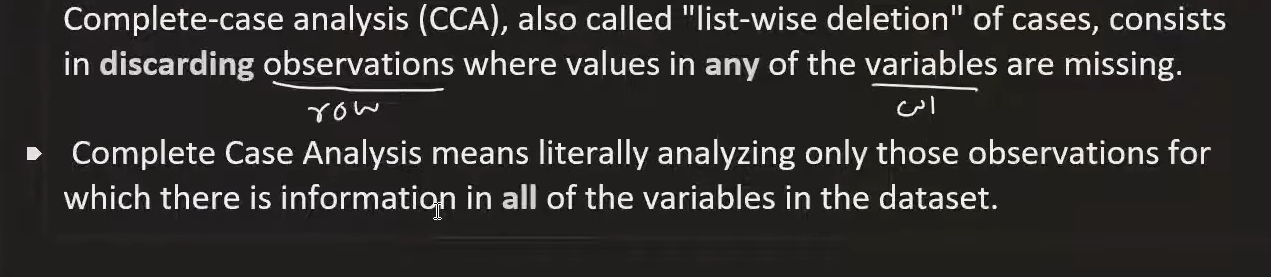

Assumptions for CCA

1) missing completely at random(agar starting ke 5 miss hai aur last ke 5 miss hai iss time pe random missing nhi hai)

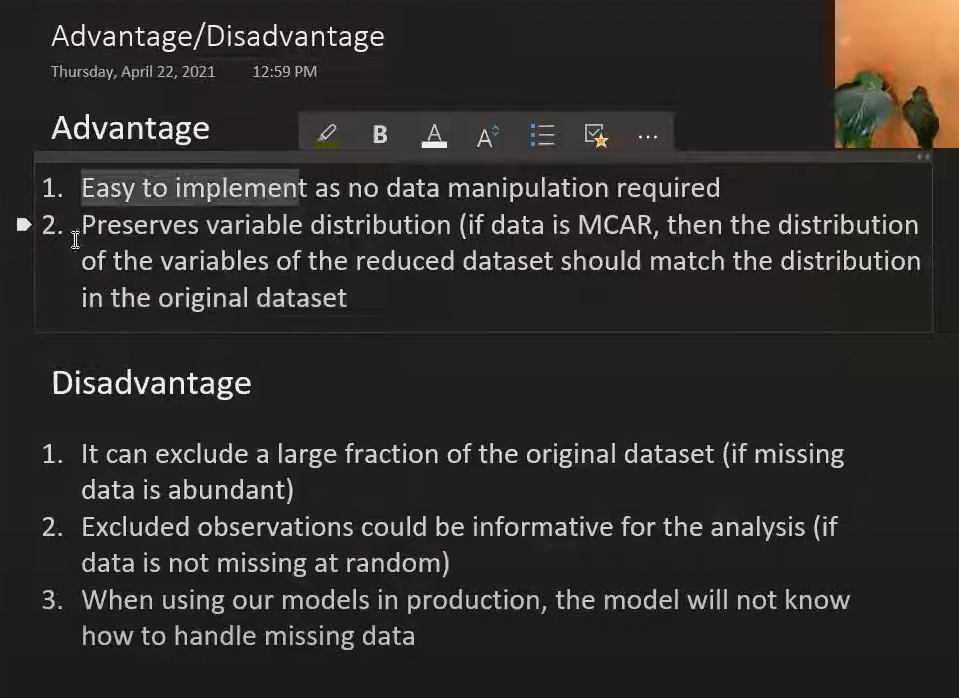

# When to use CCA--
 1) MCAR
 2) when less than 5% data is missing

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("data_science_job.csv")

In [3]:
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,20.0,NaN,NaN,36.0,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15.0,50-99,Pvt Ltd,47.0,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5.0,NaN,NaN,83.0,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,0.0,NaN,Pvt Ltd,52.0,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,20.0,50-99,Funded Startup,8.0,0.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  18679 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  float64
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  training_hours          18392 non-null  float64
 12  target                  19158 non-null  float64
dtypes: float64(4), int64(1), object(8)
memory usage: 1.9+ MB


In [5]:
df.isnull().sum()

enrollee_id                  0
city                         0
city_development_index     479
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
training_hours             766
target                       0
dtype: int64

In [7]:
df.shape[0]

19158

In [6]:
df.isnull().sum()*100/df.shape[0]

enrollee_id                0.000000
city                       0.000000
city_development_index     2.500261
gender                    23.530640
relevent_experience        0.000000
enrolled_university        2.014824
education_level            2.401086
major_discipline          14.683161
experience                 0.339284
company_size              30.994885
company_type              32.049274
training_hours             3.998330
target                     0.000000
dtype: float64

In [8]:
df.isnull().mean()

enrollee_id               0.000000
city                      0.000000
city_development_index    0.025003
gender                    0.235306
relevent_experience       0.000000
enrolled_university       0.020148
education_level           0.024011
major_discipline          0.146832
experience                0.003393
company_size              0.309949
company_type              0.320493
training_hours            0.039983
target                    0.000000
dtype: float64

In [13]:
# finding out columns where value is less than 0.05
cols = [i for i in df.columns if df[i].isnull().mean() < 0.05]
cols

['enrollee_id',
 'city',
 'city_development_index',
 'relevent_experience',
 'enrolled_university',
 'education_level',
 'experience',
 'training_hours',
 'target']

In [16]:
df[cols].sample(5)

,enrollee_id,city,city_development_index,relevent_experience,enrolled_university,education_level,experience,training_hours,target
17144,23036,city_103,0.920,Has relevent experience,no_enrollment,Graduate,5.0,103.0,0.0
5999,16792,city_114,0.926,Has relevent experience,no_enrollment,Masters,5.0,41.0,0.0
15378,28772,city_136,0.897,Has relevent experience,Full time course,Masters,9.0,17.0,0.0
12119,16485,city_21,0.624,Has relevent experience,no_enrollment,Masters,1.0,NaN,0.0
7483,225,city_173,0.878,Has relevent experience,no_enrollment,Masters,20.0,19.0,0.0


#### now in the next step you should check if you remove the data then what percentage of data is left and what percentage is removed

In [23]:
df[cols].dropna()

,enrollee_id,city,city_development_index,relevent_experience,enrolled_university,education_level,experience,training_hours,target
0,8949,city_103,0.920,Has relevent experience,no_enrollment,Graduate,20.0,36.0,1.0
1,29725,city_40,0.776,No relevent experience,no_enrollment,Graduate,15.0,47.0,0.0
2,11561,city_21,0.624,No relevent experience,Full time course,Graduate,5.0,83.0,0.0
4,666,city_162,0.767,Has relevent experience,no_enrollment,Masters,20.0,8.0,0.0
5,21651,city_176,0.764,Has relevent experience,Part time course,Graduate,11.0,24.0,1.0
...,...,...,...,...,...,...,...,...,...
19153,7386,city_173,0.878,No relevent experience,no_enrollment,Graduate,14.0,42.0,1.0
19154,31398,city_103,0.920,Has relevent experience,no_enrollment,Graduate,14.0,52.0,1.0
19155,24576,city_103,0.920,Has relevent experience,no_enrollment,Graduate,20.0,44.0,0.0
19156,5756,city_65,0.802,Has relevent experience,no_enrollment,High School,0.0,97.0,0.0


In [22]:
len(df[cols].dropna())/ len(df)

0.8968577095730244

#### Now you have to check if the distribution changes for the new data or not

#### Even after removing the data distribution should remain the same

In [24]:
new_df = df[cols].dropna()
new_df.shape, df.shape

((17182, 9), (19158, 13))

In [27]:
import seaborn as sns

In [28]:
import matplotlib.pyplot as plt
%matplotlib inline

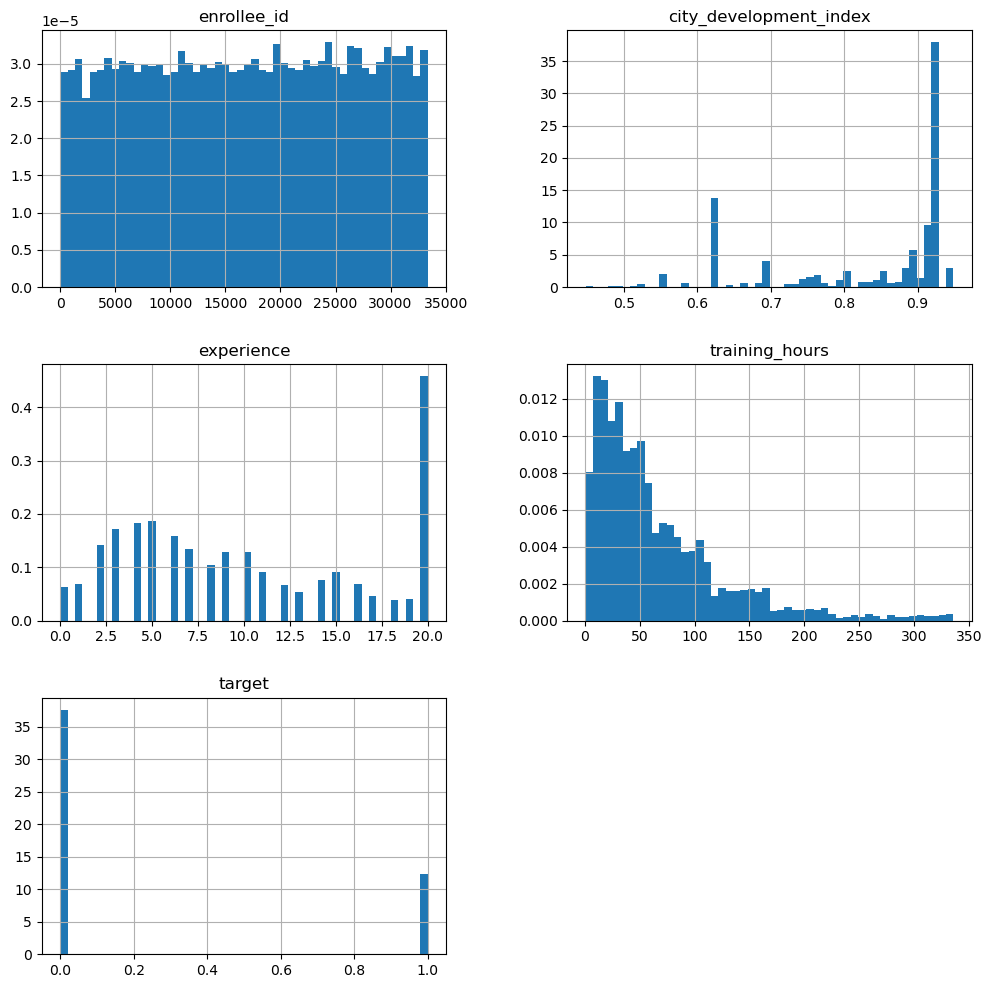

In [33]:
new_df.hist(bins=50, density=True, figsize=(12,12))
plt.show();

#### good ML engineer analyzes them individually

In [34]:
cols

['enrollee_id',
 'city',
 'city_development_index',
 'relevent_experience',
 'enrolled_university',
 'education_level',
 'experience',
 'training_hours',
 'target']

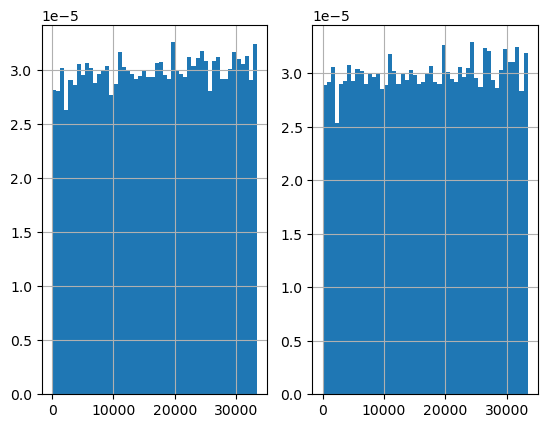

In [45]:
plt.subplot(1,2,1)
df['enrollee_id'].hist(bins=50, density=True )

plt.subplot(1,2,2)
new_df['enrollee_id'].hist(bins=50, density=True );

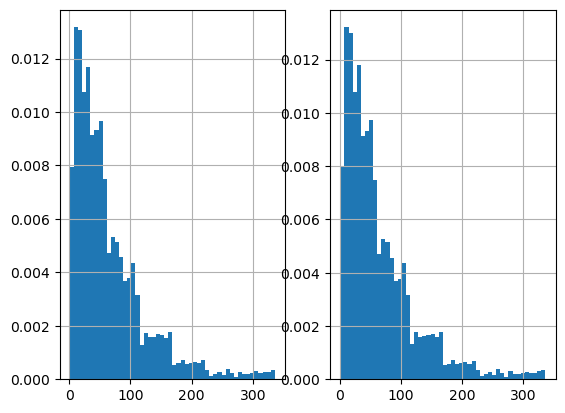

In [46]:
plt.subplot(1,2,1)
df['training_hours'].hist(bins=50, density=True )

plt.subplot(1,2,2)
new_df['training_hours'].hist(bins=50, density=True );

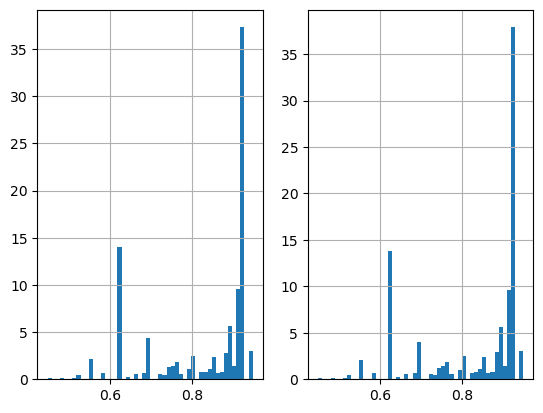

In [47]:
plt.subplot(1,2,1)
df['city_development_index'].hist(bins=50, density=True )

plt.subplot(1,2,2)
new_df['city_development_index'].hist(bins=50, density=True );

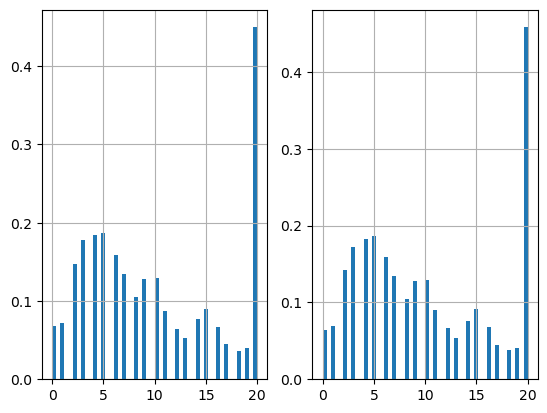

In [48]:
plt.subplot(1,2,1)
df['experience'].hist(bins=50, density=True )

plt.subplot(1,2,2)
new_df['experience'].hist(bins=50, density=True );

### Now doing the same for categorical columns

### Here ratio should be same

In [49]:
cols

['enrollee_id',
 'city',
 'city_development_index',
 'relevent_experience',
 'enrolled_university',
 'education_level',
 'experience',
 'training_hours',
 'target']

In [59]:
new_df['enrolled_university'].value_counts().values

array([12632,  3449,  1101], dtype=int64)

In [69]:
enroll_university = pd.concat([new_df['enrolled_university'].value_counts(),df['enrolled_university'].value_counts()],axis=1)

In [73]:
enroll_university.columns = ['old','new']

In [74]:
enroll_university

,old,new
enrolled_university,,
no_enrollment,12632,13817
Full time course,3449,3757
Part time course,1101,1198


In [80]:
enroll_university_ratio = pd.concat([new_df['enrolled_university'].value_counts()/len(df),df['enrolled_university'].value_counts()/len(df)],axis=1)
enroll_university_ratio.columns = ['old','new']

In [81]:
enroll_university_ratio

,old,new
enrolled_university,,
no_enrollment,0.659359,0.721213
Full time course,0.180029,0.196106
Part time course,0.057469,0.062533


In [75]:
education_level = pd.concat([new_df['education_level'].value_counts(),df['education_level'].value_counts()],axis=1)
education_level.columns = ['old','new']

In [76]:
education_level

,old,new
education_level,,
Graduate,10650,11598
Masters,4022,4361
High School,1845,2017
Phd,380,414
Primary School,285,308


In [82]:
education_level_ratio = pd.concat([new_df['education_level'].value_counts()/len(df),df['education_level'].value_counts()/len(df)],axis=1)
education_level_ratio.columns = ['old','new']

In [83]:
education_level_ratio

,old,new
education_level,,
Graduate,0.555904,0.605387
Masters,0.209938,0.227633
High School,0.096304,0.105282
Phd,0.019835,0.021610
Primary School,0.014876,0.016077
